In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB


In [2]:
data=pd.read_csv('/content/IBM Attrition Data.csv') # works with a two-dimensional array.i.e., row index and column index.

In [3]:
data.head() #to access first n rows of a dataframe. It returns smaller version useful for quickly testing ifit has the right type of data in it.

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
data.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [5]:
names = data.columns.values 
print(names)

['Age' 'Attrition' 'Department' 'DistanceFromHome' 'Education'
 'EducationField' 'EnvironmentSatisfaction' 'JobSatisfaction'
 'MaritalStatus' 'MonthlyIncome' 'NumCompaniesWorked' 'WorkLifeBalance'
 'YearsAtCompany']


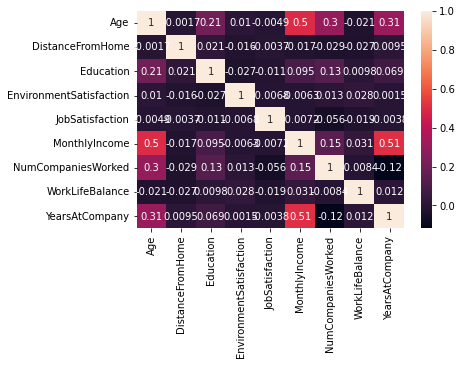

In [6]:
sns.heatmap(data.corr(),annot=True)

In [7]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
data.Attrition=le.fit_transform(data['Attrition'])
data.Department=le.fit_transform(data['Department'])
data.EducationField=le.fit_transform(data['EducationField'])
data.MaritalStatus=le.fit_transform(data['MaritalStatus'])

In [10]:
data

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,4,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,3,1,2,1,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,23,2,3,3,4,1,2571,4,3,5
1466,39,0,1,6,1,3,4,1,1,9991,4,3,7
1467,27,0,1,4,3,1,2,2,1,6142,1,3,6
1468,49,0,2,2,3,3,4,2,1,5390,2,2,9


In [11]:
#dt=data
#label_encoders={}
#categorical_coloums= dt.columns
#for columns in categorical_coloums:
#    label_encoders[columns]= preprocessing.LabelEncoder()
#    dt[columns]=label_encoders[columns].fit_transform(dt[columns])


In [12]:
features = data[['Age','Department','DistanceFromHome','Education',
 'EducationField','EnvironmentSatisfaction','JobSatisfaction',
 'MaritalStatus','MonthlyIncome','NumCompaniesWorked','WorkLifeBalance'
 ,'YearsAtCompany']]
target = data['Attrition']
attrition = data['Attrition']

In [13]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [14]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic Regression's Accuracy is:  0.8367346938775511
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       246
           1       0.50      0.02      0.04        48

    accuracy                           0.84       294
   macro avg       0.67      0.51      0.48       294
weighted avg       0.78      0.84      0.77       294



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0.84013605, 0.83333333, 0.82653061, 0.83333333, 0.84353741])

In [15]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)
score

DecisionTrees's Accuracy is:  81.97278911564626
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       246
           1       0.27      0.06      0.10        48

    accuracy                           0.82       294
   macro avg       0.56      0.51      0.50       294
weighted avg       0.75      0.82      0.77       294



array([0.81972789, 0.8537415 , 0.85714286, 0.81972789, 0.84353741])

In [16]:
NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

Naive Bayes's Accuracy is:  0.8469387755102041
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       246
           1       0.60      0.19      0.29        48

    accuracy                           0.85       294
   macro avg       0.73      0.58      0.60       294
weighted avg       0.82      0.85      0.81       294



array([0.85034014, 0.84013605, 0.84013605, 0.83673469, 0.83333333])

In [17]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

SVM's Accuracy is:  0.8299319727891157
              precision    recall  f1-score   support

           0       0.84      0.98      0.91       246
           1       0.38      0.06      0.11        48

    accuracy                           0.83       294
   macro avg       0.61      0.52      0.51       294
weighted avg       0.77      0.83      0.78       294



array([0.83673469, 0.83673469, 0.84013605, 0.84013605, 0.84013605])

In [18]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

RF's Accuracy is:  0.8401360544217688
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       246
           1       0.55      0.12      0.20        48

    accuracy                           0.84       294
   macro avg       0.70      0.55      0.56       294
weighted avg       0.80      0.84      0.80       294



array([0.83333333, 0.83673469, 0.84693878, 0.84693878, 0.85034014])

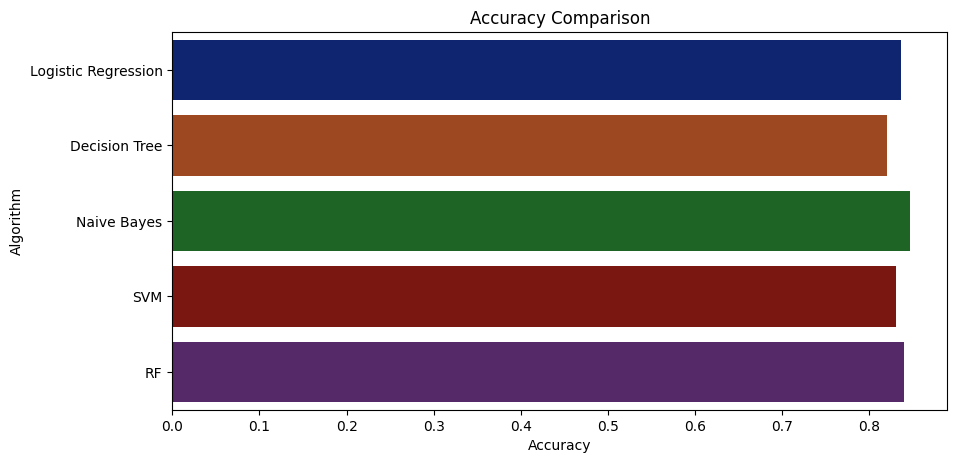

In [19]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [20]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Logistic Regression --> 0.8367346938775511
Decision Tree --> 0.8197278911564626
Naive Bayes --> 0.8469387755102041
SVM --> 0.8299319727891157
RF --> 0.8401360544217688


In [25]:
test = np.array([[49,1,8,1,1,3,2,1,5130,1,3,10]])
prediction = NaiveBayes.predict(test)
for i in prediction:
  if i == 0:
    print("Attrition")
  else:
    print("Not attrition")

Attrition


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,1,2,1,2,1,2,4,2,5993,8,1,6
1,49,0,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,1,2,2,4,4,3,2,2090,6,3,0
3,33,0,1,3,4,1,4,3,1,2909,1,3,8
4,27,0,1,2,1,3,1,2,1,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,23,2,3,3,4,1,2571,4,3,5
1466,39,0,1,6,1,3,4,1,1,9991,4,3,7
1467,27,0,1,4,3,1,2,2,1,6142,1,3,6
1468,49,0,2,2,3,3,4,2,1,5390,2,2,9
